In [1]:
# import all libraries required 
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import re

In [2]:
tchurn = pd.read_csv('train (1).csv')
tchurn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
print("There are total %d columns." %tchurn.shape[1])
print("There are total %d observations." %tchurn.shape[0])

There are total 172 columns.
There are total 69999 observations.


In [4]:
tchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
tchurn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [6]:
tchurn['max_rech_data_7'].min()

1.0

In [7]:
tchurn['max_rech_data_7'].max()

1555.0

In [8]:
tchurn['max_rech_data_7'].median()

145.0

In [9]:
tchurn['max_rech_data_7'].quantile(0.7) 

154.0

In [10]:
hvc = tchurn[tchurn['max_rech_data_7']>=154]
len(hvc)

8100

In [11]:
hvc.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,8100.000000,8100.0,7919.0,7919.0,7919.0,8100.000000,8100.000000,8100.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.0,7784.0,7720.0,7682.000000,7784.000000,7720.000000,7682.000000,7784.00000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.00000,7720.000000,8100.000000,8100.000000,8100.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.0,7784.0,7720.0,7682.000000,7784.000000,7720.000000,8100.00000,8100.000000,8100.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,7682.000000,7784.000000,7720.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,6256.00000,8100.000000,6352.000000,6256.000000,8100.000000,6352.000000,6256.000000,8100.000000,6352.000000,6256.000000,8100.000000,6352.000000,6256.000000,8100.000000,6352.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,6256.000000,8100.000000,6352.000000,6256.000000,8100.000000,6352.000000,6256.000000,8

In [12]:
hvc['max_rech_data_7'].describe()

count    8100.000000
mean      212.006296
std       101.520301
min       154.000000
25%       154.000000
50%       179.000000
75%       252.000000
max      1555.000000
Name: max_rech_data_7, dtype: float64

In [13]:
for col in tchurn.columns:
    print(col)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

In [14]:
#3 columns have month name as part of their name lets make them similar to other columns
tchurn = tchurn.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                                'aug_vbc_3g': 'vbc_3g_8'})
#lets get all the column names
for col in tchurn.columns:
    print(col)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

In [15]:
#lets get all null values of all columns in percentages 
print("Total Null Values in percentage:\n")
(100*(tchurn.isnull().sum())/len(tchurn.index))

Total Null Values in percentage:



id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

1. Identify highly value/profitable customers before we perform anyother operations on data due to it's huge volume.
2. There are almost 21K high value customers. Computation of those rows which will take lesser time than computation of the whole data.
3. Filter high value customers: Define high-value customers as follows: Those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase).

In [16]:
#Identify high value customers
#Check if they have null values
tchurn[['total_rech_amt_7','total_rech_amt_6','av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_6',
        'total_rech_data_7']].isnull().sum()

total_rech_amt_7          0
total_rech_amt_6          0
av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
total_rech_data_6     52431
total_rech_data_7     52134
dtype: int64

In [17]:
# Impute missing values with '0' to extract high value customers for these columns 
tchurn[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6',
        'total_rech_data_7','total_rech_data_8']]=tchurn[['av_rech_amt_data_6','av_rech_amt_data_7',
   'av_rech_amt_data_8', 'total_rech_data_6','total_rech_data_7','total_rech_data_8']].fillna(0, axis=1)

In [18]:
# Impute all these columns with '0' as they look important for model building
col4 = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
        'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7',
        'arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
tchurn[col4]=tchurn[col4].replace(np.nan, 0)

In [19]:
tchurn.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

### Feature Engineering
1. Create new fetures for calculating average recharge amount
2. Drop features which do not add any value.
3. Impute columns with '0' if they are important for further analysis else drop

In [20]:
# Sum all types of data recharge in the month
tchurn['total_rech_num_data_6'] = (tchurn['count_rech_2g_6']+tchurn['count_rech_3g_6']).astype(int)
tchurn['total_rech_num_data_7'] = (tchurn['count_rech_2g_7']+tchurn['count_rech_3g_7']).astype(int)
tchurn['total_rech_num_data_8'] = (tchurn['count_rech_2g_8']+tchurn['count_rech_3g_8']).astype(int)

# Calculate total amount spent on recharging data(mobile internet) in the month
# Multiply amount with number of times it was recharged for data 
tchurn['total_rech_amt_data_6'] = tchurn['total_rech_num_data_6']*tchurn['av_rech_amt_data_6']
tchurn['total_rech_amt_data_7'] = tchurn['total_rech_num_data_7']*tchurn['av_rech_amt_data_7']
tchurn['total_rech_amt_data_8'] = tchurn['total_rech_num_data_8']*tchurn['av_rech_amt_data_8']

# Calculate total monthly recharge for data and call, so sum amounts spents on call and data recharge for the month.
tchurn['total_month_rech_6'] = tchurn['total_rech_amt_6']+tchurn['total_rech_amt_data_6']
tchurn['total_month_rech_7'] = tchurn['total_rech_amt_7']+tchurn['total_rech_amt_data_7']
tchurn['total_month_rech_8'] = tchurn['total_rech_amt_8']+tchurn['total_rech_amt_data_8']

### High Value Customer Extraction

In [21]:
#lets extract high value customers based on the average recharge amount in the first two months(6,7)
hv_cust=tchurn[tchurn[['total_month_rech_6','total_month_rech_7']].mean(axis=1)> tchurn[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)]

In [22]:
# high value customers hv_cust.info()
print("There are total %d features." %hv_cust.shape[1])
print("There are total %d observations." %hv_cust.shape[0])

There are total 181 features.
There are total 20998 observations.


In [23]:
# Null values of all columns in percentages
print("Total Null Values in percentage:\n")
(100*(hv_cust.isnull().sum())/len(hv_cust.index))

Total Null Values in percentage:



id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.795314
std_og_t2o_mou               0.795314
loc_ic_t2o_mou               0.795314
last_date_of_month_6         0.000000
last_date_of_month_7         0.071435
last_date_of_month_8         0.528622
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.885894
onnet_mou_7                  1.866844
onnet_mou_8                  3.909896
offnet_mou_6                 1.885894
offnet_mou_7                 1.866844
offnet_mou_8                 3.909896
roam_ic_mou_6                1.885894
roam_ic_mou_7                1.866844
roam_ic_mou_8                3.909896
roam_og_mou_6                1.885894
roam_og_mou_7                1.866844
roam_og_mou_8                3.909896
loc_og_t2t_mou_6             1.885894
loc_og_t2t_mou_7             1.866844
loc_og_t2t_mou_8             3.909896
loc_og_t2m_m

In [24]:
# Function to find columns where more than 49 percent of values are null 
def nullvalue(cutoff):
    null = (100*(hv_cust.isnull().sum())/len(hv_cust.index))
    print("{} features have more than {}% null values".format(len(null.loc[null > cutoff]),cutoff))
    return null.loc[null > cutoff]
nullvalue(49)

0 features have more than 49% null values


Series([], dtype: float64)

### Define: Churned Customer

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the third month. Tag these as churned customers (churn=1, else 0). The attributes to used for churners are:

1. total_ic_mou_8

2. total_og_mou_8

3. vol_2g_mb_8

4. vol_3g_mb_8

After tagging churners, remove attributes corresponding to churn phase (with ‘ _8’, in names)

In [25]:
col1 = ['vol_3g_mb_8', 'vol_2g_mb_8','total_ic_mou_8','total_og_mou_8']
hv_cust['churn']=hv_cust[col1].apply(lambda x: 1 if ((x['vol_3g_mb_8']==0) & (x['vol_2g_mb_8']==0.0) & 
        (x['total_ic_mou_8']==0)  & (x['total_og_mou_8']==0)) else 0, axis=1)

In [26]:
print("Total number of customers churned is:",len(hv_cust[hv_cust['churn']==1]))
print("Total number of customers non-churned is:",len(hv_cust[hv_cust['churn']==0]))

Total number of customers churned is: 1118
Total number of customers non-churned is: 19880


In [27]:
# High Value Customer dataset
hv_cust.shape

(20998, 182)

### SMOTE to address data imbalance
1. Data is imbalanced so need to be careful before dropping any rows.
2. We will use smote to balance data before performing PCA.

In [28]:
#After tagging churners, remove all attributes corresponding to the churn phase
#(all attributes with ‘ _8’, in their names)
import re
#filter all columns where last char in column name is _9
col2 = hv_cust.filter(regex=('_8')).columns
#drop these columns as mentioned
hv_cust.drop(col2,axis=1,inplace=True)

In [29]:
#hv_cust.info()
print("Total features.",hv_cust.shape[1])
print("Total observations.",hv_cust.shape[0])

Total features. 124
Total observations. 20998


In [30]:
#Circle id can be dropped
hv_cust.circle_id.value_counts()
hv_cust.drop(['circle_id'],axis=1,inplace=True)

In [31]:
# Identify date columns for converting to datetime format
col3 = hv_cust.filter(regex=('date')).columns
col3

Index(['last_date_of_month_6', 'last_date_of_month_7', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7'], dtype='object')

In [32]:
# Convert dtype of date columns to datetime
hv_cust['last_date_of_month_6'] = pd.to_datetime(hv_cust['last_date_of_month_6'], format='%m/%d/%Y')
hv_cust['last_date_of_month_7'] = pd.to_datetime(hv_cust['last_date_of_month_7'], format='%m/%d/%Y')

hv_cust['date_of_last_rech_6'] = pd.to_datetime(hv_cust['date_of_last_rech_6'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_7'] = pd.to_datetime(hv_cust['date_of_last_rech_7'], format='%m/%d/%Y')

hv_cust['date_of_last_rech_data_6'] = pd.to_datetime(hv_cust['date_of_last_rech_data_6'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_data_7'] = pd.to_datetime(hv_cust['date_of_last_rech_data_7'], format='%m/%d/%Y')


In [33]:
# Columns that only have 0 and null values
print(hv_cust['loc_og_t2o_mou'].unique())
print(hv_cust['std_og_t2o_mou'].unique())
print(hv_cust['loc_ic_t2o_mou'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [34]:
# Columns that only have 0 and null values
print(hv_cust['std_og_t2c_mou_6'].unique())
print(hv_cust['std_og_t2c_mou_7'].unique())

print(hv_cust['std_ic_t2o_mou_6'].unique())
print(hv_cust['std_ic_t2o_mou_7'].unique())


[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]


In [35]:
#lets drop these columns from dataset
hv_cust.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_6','std_ic_t2o_mou_7'],inplace=True,axis=1)

In [36]:
# Columns that have more than 3% missing values
nullvalue(3)

2 features have more than 3% null values


date_of_last_rech_data_6    44.351843
date_of_last_rech_data_7    43.261263
dtype: float64

In [37]:
# Drop 2 date columns that have more than 40% null values 

hv_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7'],inplace=True,axis=1)

In [38]:
missing3 = list(nullvalue(3).index)
missing3

0 features have more than 3% null values


[]

In [39]:
# Checking date columns for unique values.
hv_cust['date_of_last_rech_6'].unique()
hv_cust['date_of_last_rech_7'].unique()

array(['2014-07-26T00:00:00.000000000', '2014-07-25T00:00:00.000000000',
       '2014-07-31T00:00:00.000000000', '2014-07-20T00:00:00.000000000',
       '2014-07-27T00:00:00.000000000', '2014-07-29T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2014-07-10T00:00:00.000000000',
       '2014-07-28T00:00:00.000000000', '2014-07-12T00:00:00.000000000',
       '2014-07-22T00:00:00.000000000', '2014-07-24T00:00:00.000000000',
       '2014-07-21T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-15T00:00:00.000000000', '2014-07-16T00:00:00.000000000',
                                 'NaT', '2014-07-17T00:00:00.000000000',
       '2014-07-19T00:00:00.000000000', '2014-07-14T00:00:00.000000000',
       '2014-07-13T00:00:00.000000000', '2014-07-18T00:00:00.000000000',
       '2014-07-09T00:00:00.000000000', '2014-07-08T00:00:00.000000000',
       '2014-07-07T00:00:00.000000000', '2014-07-11T00:00:00.000000000',
       '2014-07-03T00:00:00.000000000', '2014-07-06

In [40]:
#Fill null values with the previous ones
hv_cust['date_of_last_rech_6'].fillna(method ='pad',inplace=True) 
hv_cust['date_of_last_rech_7'].fillna(method ='pad',inplace=True) 
 
# Columns that have more than 1% missing values
nullvalue(0)

58 features have more than 0% null values


loc_og_t2o_mou          0.795314
std_og_t2o_mou          0.795314
loc_ic_t2o_mou          0.795314
last_date_of_month_7    0.071435
onnet_mou_6             1.885894
onnet_mou_7             1.866844
offnet_mou_6            1.885894
offnet_mou_7            1.866844
roam_ic_mou_6           1.885894
roam_ic_mou_7           1.866844
roam_og_mou_6           1.885894
roam_og_mou_7           1.866844
loc_og_t2t_mou_6        1.885894
loc_og_t2t_mou_7        1.866844
loc_og_t2m_mou_6        1.885894
loc_og_t2m_mou_7        1.866844
loc_og_t2f_mou_6        1.885894
loc_og_t2f_mou_7        1.866844
loc_og_t2c_mou_6        1.885894
loc_og_t2c_mou_7        1.866844
loc_og_mou_6            1.885894
loc_og_mou_7            1.866844
std_og_t2t_mou_6        1.885894
std_og_t2t_mou_7        1.866844
std_og_t2m_mou_6        1.885894
std_og_t2m_mou_7        1.866844
std_og_t2f_mou_6        1.885894
std_og_t2f_mou_7        1.866844
std_og_mou_6            1.885894
std_og_mou_7            1.866844
isd_og_mou

In [41]:
# Date columns for unique values.
print(hv_cust['last_date_of_month_6'].unique())
hv_cust['last_date_of_month_7'].unique()

['2014-06-30T00:00:00.000000000']


array(['2014-07-31T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [42]:
# Fill null values with previous ones in the dataset
hv_cust['last_date_of_month_6'].fillna(method ='pad',inplace=True) 
hv_cust['last_date_of_month_7'].fillna(method ='pad',inplace=True) 

In [43]:
# Columns with null values 
missing0 = list(nullvalue(0).index)

57 features have more than 0% null values


In [44]:
# Impute all these columns with '0' 
hv_cust[missing0]=hv_cust[missing0].replace(np.nan, 0)

In [45]:
# Checking for null values 
nullvalue(0)

0 features have more than 0% null values


Series([], dtype: float64)

In [46]:
# Dataset for analysis
print("Total features.",hv_cust.shape[1])
print("Total observations.",hv_cust.shape[0])

Total features. 117
Total observations. 20998


In [47]:
# Column names
hv_cust.columns.values

array(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'arpu_6', 'arpu_7',
       'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6',
       'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t

### Exploratory Data Analysis

Text(0.5, 1.0, 'Outgoing roaming Usage mon-7- Box Plot')

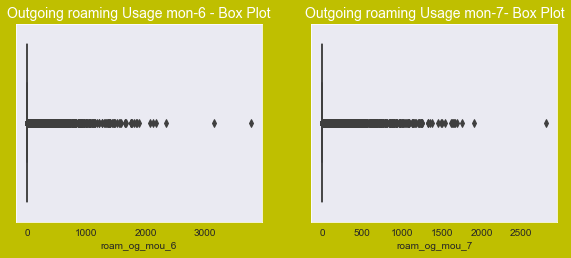

In [153]:
# Data distribution 
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['roam_og_mou_6'])
ax.set_title('Outgoing roaming Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['roam_og_mou_7'])
ax.set_title('Outgoing roaming Usage mon-7- Box Plot',fontsize=14,color='w')


Text(0.5, 1.0, 'total Outgoing Usage mon-7- Box Plot')

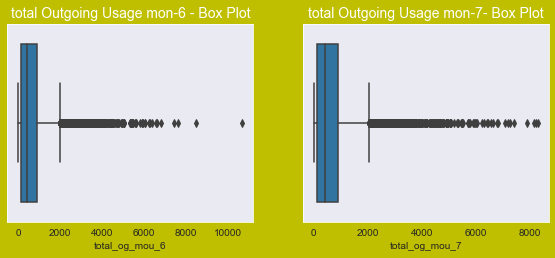

In [49]:
# Lets see distribution of same fields in each motnh using box plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['total_og_mou_6'])
ax.set_title('total Outgoing Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['total_og_mou_7'])
ax.set_title('total Outgoing Usage mon-7- Box Plot',fontsize=14,color='w')


Text(0.5, 1.0, 'total incoming Usage mon-7- Box Plot')

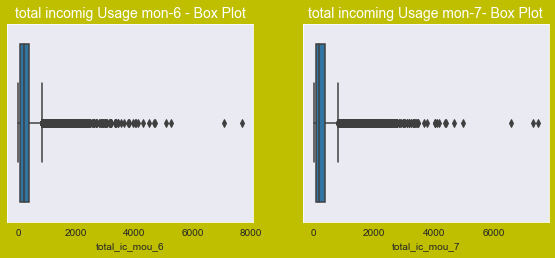

In [50]:
# Data distribution

plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['total_ic_mou_6'])
ax.set_title('total incomig Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['total_ic_mou_7'])
ax.set_title('total incoming Usage mon-7- Box Plot',fontsize=14,color='w')

Text(0.5, 1.0, 'Last Recharge amount mon-7 - BOx Plot')

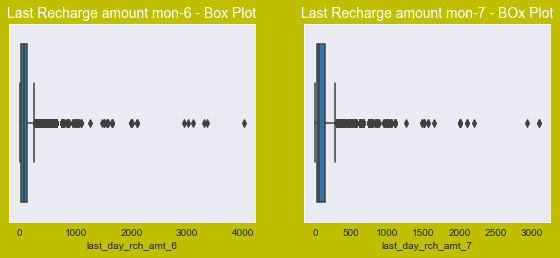

In [51]:
# Data distribution

plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['last_day_rch_amt_6'])
ax.set_title('Last Recharge amount mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['last_day_rch_amt_7'])
ax.set_title('Last Recharge amount mon-7 - BOx Plot',fontsize=14,color='w')


Text(0.5, 1.0, 'Total monthly recharge-7 - BOx Plot')

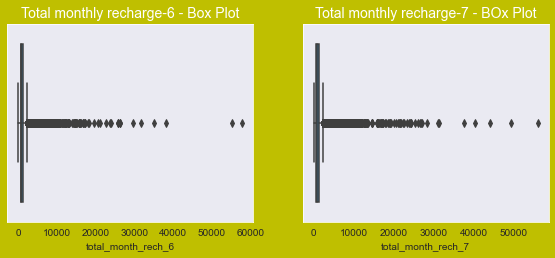

In [52]:
# Data distribution

plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(hv_cust['total_month_rech_6'])
ax.set_title('Total monthly recharge-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(hv_cust['total_month_rech_7'])
ax.set_title('Total monthly recharge-7 - BOx Plot',fontsize=14,color='w')


# Observation: 
# Distribution of total monthly recharge amount in august shows customer has reduced recharge amount for sure. 
# but it should have been increased or constant if customer is happy but it doesn't look that way.

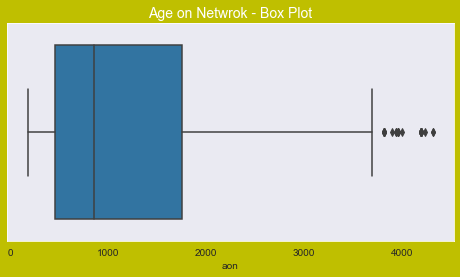

In [53]:
# Data distribution

plt.figure(figsize=(8,4),facecolor='y')
sns.set_style("dark")
ax = sns.boxplot(hv_cust['aon'])
ax.set_title('Age on Netwrok - Box Plot',fontsize=14,color='w')
plt.show()

In [54]:
# Sum of total isd MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['isd_og_mou_6','isd_og_mou_7'].sum()

,isd_og_mou_6,isd_og_mou_7
churn,,
0,42902.90,44506.68
1,6000.06,2222.11


In [55]:
# Mean of total 3G usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7'].mean()

,vol_3g_mb_6,vol_3g_mb_7
churn,,
0,349.483295,384.010359
1,286.923104,132.664973


In [56]:
# Mean of total 2G usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7'].mean()

,vol_2g_mb_6,vol_2g_mb_7
churn,,
0,127.585610,129.088333
1,100.669249,58.579758


In [57]:
# Mean of total std MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['std_og_mou_6','std_og_mou_7'].mean()

,std_og_mou_6,std_og_mou_7
churn,,
0,332.838065,366.843717
1,687.295134,350.001860


In [58]:
# Sum of total special MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['spl_og_mou_6','spl_og_mou_7'].sum()

,spl_og_mou_6,spl_og_mou_7
churn,,
0,116062.51,144516.57
1,7411.47,5492.63


In [59]:
# Mean of total incoming MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7'].mean()

,total_ic_mou_6,total_ic_mou_7
churn,,
0,291.316821,303.049245
1,226.504866,114.051530


In [60]:
# Mean of total outgoing MOU per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_og_mou_6','total_og_mou_7'].mean()

,total_og_mou_6,total_og_mou_7
churn,,
0,599.780971,638.770955
1,860.220894,437.969204


In [61]:
# Mean of total monthly recharge per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7'].mean()

,total_rech_amt_6,total_rech_amt_7
churn,,
0,651.534256,666.423642
1,846.449911,497.833631


In [62]:
# Mean of outgoing in roaming usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['roam_og_mou_6','roam_og_mou_7'].mean()

,roam_og_mou_6,roam_og_mou_7
churn,,
0,25.116246,17.738829
1,65.906270,66.491458


In [63]:
# Mean of maximum recharge amount per month churn vs Non-Churn
hv_cust.groupby(['churn'])['max_rech_amt_6','max_rech_amt_7'].mean()

,max_rech_amt_6,max_rech_amt_7
churn,,
0,168.256237,171.878018
1,181.472272,147.748658


In [64]:
# Mean of count of total data recharge per month churn vs Non-Churn
hv_cust.groupby(['churn'])['total_rech_num_data_6','total_rech_num_data_7'].mean()

,total_rech_num_data_6,total_rech_num_data_7
churn,,
0,1.672837,1.916700
1,1.490161,0.836315


In [65]:
# Mean of last recharge amount churn vs Non-Churn
hv_cust.groupby(['churn'])['last_day_rch_amt_6','last_day_rch_amt_7'].mean()

,last_day_rch_amt_6,last_day_rch_amt_7
churn,,
0,100.821378,101.639638
1,109.860465,64.589445


In [66]:
# Mean of local outgoing on same network usage per month churn vs Non-Churn
hv_cust.groupby(['churn'])['loc_og_t2t_mou_6','loc_og_t2t_mou_7'].mean()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7
churn,,
0,85.746013,88.636702
1,53.856163,24.672496


In [67]:
# Mean of age on network churn vs Non-Churn
hv_cust.groupby(['churn'])['aon'].mean()

churn
0    1230.105382
1     860.203936
Name: aon, dtype: float64

In [214]:
hv_cust.columns

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'vbc_3g_7', 'vbc_3g_6', 'churn_probability', 'total_rech_num_data_6', 'total_rech_num_data_7', 'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_month_rech_6', 'total_month_rech_7', 'churn'], dtype='object', length=112)

For July, we can observe below points from above data analysis for customers labeled as churn:
1. Minutes of outgoing calls dropped
2. Volume of 3G usage declined
3. 2G usage dropped 
4. Minutes of usage dropped 
5. Sum of special MoU reduced 
6. Total incoming & outgoing MoU, monthly, maximum and last recharge amount shrunk 
7. Local outgoing on same network usage dropped
8. Customers that churned stayed on the network less number of days than the customers who did not churn

### PCA & Modeling 

In [68]:
# Copy of the dataframe
hv_custcopy = hv_cust
print(hv_custcopy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20998 entries, 4 to 69997
Columns: 117 entries, id to churn
dtypes: datetime64[ns](4), float64(91), int64(22)
memory usage: 18.9 MB
None


In [69]:
hv_custcopy.head(3)

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,total_rech_num_data_6,total_rech_num_data_7,total_rech_amt_data_6,total_rech_amt_data_7,total_month_rech_6,total_month_rech_7,churn
4,4,0.0,0.0,0.0,2014-06-30,2014-07-31,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.0,9.85,58.91,25.94,0.0,0.0,4.35,0.0,0.0,0.0,4.35,0.0,0.0,0.0,0.00,17.00,0.0,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.0,0.00,13,10,290,136,50,41,2014-06-25,2014-07-26,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.0,0.0,0.0,35.0,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,1.0,1.0,647,0.0,0.0,0,7,7,1225.0,1337.0,1515.0,1473.0,0
15,15,0.0,0.0,0.0,2014-06-30,2014-07-31,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.00,327.46,366.79,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.0,0.0,0.00,0.0,0.0,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.0,0.00,5,3,654,400,250,250,2014-06-27,2014-07-25,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.0,0.0,0.0,0.0,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,1.0,0.0,602,0.0,0.0,0,1,0,154.0,0.0,808.0,400.0,0
23,23,0.0,0.0,0.0,2014-06-30,2014-07-31,1130.948,905.506,859.53,372.71,293.46,450.11,0.00,0.0,0.00,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.00,950.91,822.78,0.0,0.0,202.08,0.0,0.0,0.0,202.08,0.0,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.0,0.0,207.03,0.0,0.0,0.00,207.03,0.00,598.54,448.36,0.13,0.0,0.0,0.0,0.0,0.15,26,19,1420,990,110,110,2014-06-30,2014-07-31,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,455,0.0,0.0,0,0,0,0.0,0.0,1420.0,990.0,0


In [70]:
hv_custcopy.describe()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,total_rech_num_data_6,total_rech_num_data_7,total_rech_amt_data_6,total_rech_amt_data_7,total_month_rech_6,total_month_rech_7,churn
count,20998.000000,20998.0,20998.0,20998.0,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.00000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000
mean,34996.153586,0.0,0.0,0.0,558.615136,558.865269,262.640469,268.004666,376.334644,377.859598,16.085696,12.829175,27.288036,20.334574,84.048096,85.231045,162.725346,161.139631,6.259113,6.344762,1.593639,1.864555,253.040807,252.723770,167.772996,174.661735,182.156262,189.556875,1.777455,1.724675,351.710482,365.947004,2.328934,2.225392,5.880273,7.143976,0.678127,0.031549,613.647617,628.079634,65.216380,65.950269,149.462652,149.300011,15.341242,16.136582,230.029907,231.396568,14.449509,15.230417,28.913671,30.531762,2.727474,2.770188,46.094221,48.535996,287.866027,292.986409,0.061732,0.018929,10.469599,11.488113,1.202451,1.539258,11.874845,11.71483,661.912182,657.447376,168.959901,170.593295,101.302648,99.666968,1.663111,1.859177,77.976188,79.523669,1.235022,1.400800,0.428088,0.458377,130.486771,139.960800,126.152497,125.334233,346.152392,370.627935,67.197180,68.348709,63.586693,64.5

In [71]:
# Remove aon column 
hv_custcopy.drop(['aon'], axis=1, inplace=True)

In [72]:
# Remove datetime columns 
datecols = list(hv_custcopy.select_dtypes(include=['datetime']).columns)
print(datecols)
hv_custcopy.drop(datecols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'date_of_last_rech_6', 'date_of_last_rech_7']


In [73]:
# Train Test split 
from sklearn.model_selection import train_test_split
X = hv_custcopy.drop(['churn'], axis=1)
y = hv_custcopy['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [74]:
# Minmax scaling before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
# fit transform scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

In [76]:
# print label count
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 785
counts of label '0': 13913


In [77]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/dhruvchopra/opt/anaconda3/lib/python3.8/site-packages (0.9.1)
  Using cached scikit_learn-1.1.1-cp38-cp38-macosx_10_13_x86_64.whl (8.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [78]:
! pip install SMOTE

In [89]:
!pip install scikit-learn==1.1.1

  Using cached scikit_learn-1.1.1-cp38-cp38-macosx_10_13_x86_64.whl (8.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0


In [90]:
# Oversampling with SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smo, y_train_smo = oversample.fit_resample(X_train, y_train)

In [91]:
# Print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 13913
counts of label '0': 13913


In [96]:
# PCA on train dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_smo)

PCA()

In [97]:
pca.explained_variance_ratio_[:50]

array([4.07319049e-01, 2.33048645e-01, 1.00028186e-01, 7.84894176e-02,
       2.66688880e-02, 2.37327633e-02, 1.45818043e-02, 1.42509194e-02,
       1.16823758e-02, 1.11181310e-02, 7.42140498e-03, 7.20498224e-03,
       5.75685045e-03, 5.15130674e-03, 4.50436341e-03, 4.21892663e-03,
       3.75874330e-03, 3.36284779e-03, 3.03457430e-03, 2.49565756e-03,
       2.31538326e-03, 2.14803572e-03, 1.94545457e-03, 1.84582806e-03,
       1.62266031e-03, 1.55048600e-03, 1.46483123e-03, 1.32962319e-03,
       1.22597624e-03, 1.15727720e-03, 1.12497260e-03, 1.09539907e-03,
       9.21048629e-04, 8.65718732e-04, 8.07641313e-04, 7.29558555e-04,
       6.81264632e-04, 6.50517367e-04, 6.06788801e-04, 5.55521885e-04,
       5.13390635e-04, 4.82645214e-04, 4.80068574e-04, 4.49166954e-04,
       4.34991076e-04, 4.18015154e-04, 3.84044916e-04, 3.66610822e-04,
       3.21620279e-04, 3.10316835e-04])

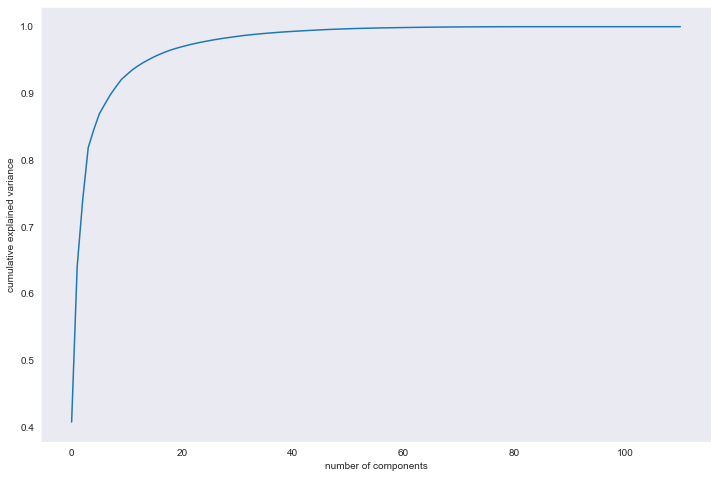

In [98]:
# Screeplot between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [99]:
# Incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=35)

In [100]:
# fit
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(27826, 35)

In [101]:
# Correlation matrix for principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# correlations are close to 0

max corr: 0.00407898588425045 , min corr:  -0.004737125334433454


In [102]:
# Apply selected components to the test data -> 35 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(6300, 35)

### Logistic Regression

In [103]:
# Import library and fit train model on train data
# Class_weight="balanced":it basically means replicating the smaller class until you have as many samples as in the larger one, 
# But in an implicit way.Though we have already used smote but here we can use this too.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca2 = LogisticRegression(class_weight='balanced')
learner_pca2.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [104]:
# Predict on training set
dtrain_predictions = learner_pca2.predict(X_train_pca)
dtrain_predprob = learner_pca2.predict_proba(X_train_pca)[:,1]

In [105]:
# Print scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

Accuracy : 0.8872277725867892
Recall/Sensitivity : 0.8472651477035865
AUC Score (Train): 0.9532987977175512


In [106]:
# Predict on test dataset.

pred_probs_test = learner_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8780545251133487
precision score: 0.3979739507959479
Sensitivity/Recall : 0.8258258258258259
Specificity: 0.9302832244008714
False Positive Rate: 0.06971677559912855
Positive predictive value: 0.3979739507959479
Negative Predictive value: 0.9896594758423961
Accuracy : 0.9247619047619048


In [107]:
# Check with probability cutoff 0.5
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.225420,0
1,0,0.092293,0
2,0,0.049162,0
3,0,0.122268,0
4,0,0.159637,0


In [108]:
# Define custom function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

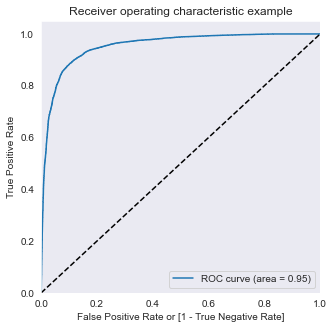

In [110]:
# ROC curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [111]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225420,0,1,1,1,0,0,0,0,0,0,0
1,0,0.092293,0,1,0,0,0,0,0,0,0,0,0
2,0,0.049162,0,1,0,0,0,0,0,0,0,0,0
3,0,0.122268,0,1,1,0,0,0,0,0,0,0,0
4,0,0.159637,0,1,1,0,0,0,0,0,0,0,0


In [112]:
# Accuracy, Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.742902  0.988500  0.497305
0.2   0.2  0.844785  0.965500  0.724071
0.3   0.3  0.883850  0.933372  0.834328
0.4   0.4  0.891361  0.885790  0.896931
0.5   0.5  0.887228  0.847265  0.927190
0.6   0.6  0.874757  0.807303  0.942212
0.7   0.7  0.862287  0.773521  0.951053
0.8   0.8  0.849421  0.738949  0.959894
0.9   0.9  0.822828  0.672393  0.973262


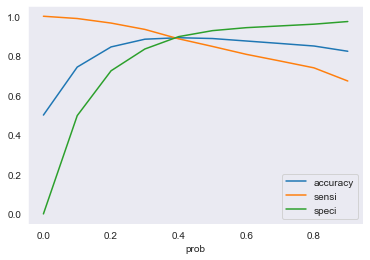

In [113]:
# Plot Accuracy, Sensitivity and Specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [114]:
# Apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.225420,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.092293,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.049162,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.122268,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.159637,0,1,1,0,0,0,0,0,0,0,0,0


In [115]:
# Predict on train dataset with optimal cutoff probability
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.225420,0
1,0,0.092293,0
2,0,0.049162,0
3,0,0.122268,0
4,0,0.159637,0


In [116]:
# Model evaluation

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8903543448573277
precision score: 0.9105064247921391
Sensitivity/Recall : 0.8658089556529864
Specificity: 0.9148997340616689
False Positive Rate: 0.08510026593833106
Positive predictive value: 0.9105064247921391
Negative Predictive value: 0.8720882433543437


In [117]:
# Prediction on test datset with optimal cutoff 
y_test_pred = learner_pca2.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
12959,0,0.141050,0
36879,0,0.232637,0
40807,0,0.203256,0
57070,1,0.995649,1
53303,0,0.157788,0


In [191]:
y_test_pred_final.Churn_Prob.to_csv('churn_probability.csv')

In [192]:
df = pd.read_csv('churn_probability.csv')

In [196]:
df.columns

Index(['Unnamed: 0', 'Churn_Prob'], dtype='object')

In [206]:
df.rename(columns={'Unnamed: 0':'id',  'Churn_Prob': 'churn_probability'}, inplace = True)

In [207]:
df.to_csv('churn_probability.csv', index= False)

In [208]:
df1 = pd.read_csv('churn_probability.csv')
df1.head()

,id,churn_probability
0,12959,0.141050
1,36879,0.232637
2,40807,0.203256
3,57070,0.995649
4,53303,0.157788


In [209]:
len(df1)

6300

In [118]:
# Model Performance
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8796126443185268
precision score : 0.3650586701434159
Sensitivity/Recall : 0.8408408408408409
Specificity: 0.9183844477962125
False Positive Rate: 0.0816155522037875
Positive predictive value: 0.3650586701434159
Negative Predictive value: 0.990421109705404


### Random Forest

In [154]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf1 = RandomForestClassifier()

# fit tree on training data
rf1 = GridSearchCV(rf1, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf1.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [155]:
# scores of GridSearch CV
scores = rf1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.211749,0.070391,0.043680,0.001773,10,{'max_depth': 10},0.942867,0.934232,0.939623,0.933333,0.936388,0.937289,0.003532,4,0.954492,0.954360,0.954000,0.957145,0.953910,0.954781,0.001201
1,7.554897,0.137448,0.052325,0.001671,15,{'max_depth': 15},0.971973,0.964420,0.964780,0.959569,0.968014,0.965751,0.004117,3,0.989039,0.987781,0.988770,0.988096,0.988680,0.988473,0.000463
2,8.069215,0.199472,0.057167,0.001456,20,{'max_depth': 20},0.975027,0.968913,0.970710,0.967296,0.970889,0.970567,0.002587,2,0.996271,0.995732,0.996316,0.996092,0.996811,0.996245,0.000350
3,8.495904,0.070801,0.060053,0.003181,25,{'max_depth': 25},0.975566,0.969632,0.970350,0.968194,0.972327,0.971214,0.002551,1,0.999416,0.999730,0.999461,0.999596,0.999641,0.999569,0.000116


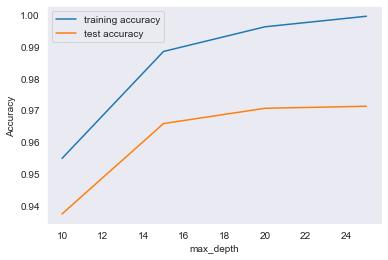

In [156]:
# Plot Accuracy v/s max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [157]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model (note we are specifying a max_depth)
rf2 = RandomForestClassifier(max_depth=20)

# fit tree on training data
rf2 = GridSearchCV(rf2, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf2.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [158]:
# GridSearch CV score
scores2 = rf2.cv_results_
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.148023,0.069782,0.031201,0.002316,50,{'n_estimators': 50},0.975566,0.968014,0.969093,0.964420,0.970889,0.969597,0.003657,4,0.995777,0.995957,0.996227,0.995643,0.996586,0.996038,0.000337
1,6.338980,0.181607,0.045635,0.002460,75,{'n_estimators': 75},0.975925,0.969272,0.970350,0.966577,0.971608,0.970747,0.003075,3,0.995508,0.995822,0.996766,0.996092,0.996451,0.996128,0.000445
2,8.187576,0.115529,0.059004,0.002577,100,{'n_estimators': 100},0.975386,0.968014,0.971249,0.967296,0.972507,0.970890,0.002971,2,0.996316,0.995912,0.996406,0.996541,0.997080,0.996451,0.000378
3,10.382355,0.086483,0.073744,0.001704,125,{'n_estimators': 125},0.975566,0.969093,0.971429,0.967835,0.972507,0.971286,0.002704,1,0.995687,0.996182,0.996316,0.996586,0.996900,0.996334,0.000406


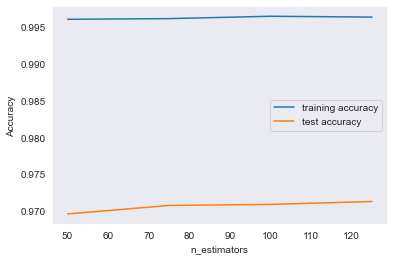

In [159]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_train_score"], 
         label="training accuracy")
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [160]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80)


# fit tree on training data
rf3 = GridSearchCV(rf3, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf3.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=80),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [126]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              n_estimators=80),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [127]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.211384,0.035968,0.034189,0.000584,100,{'min_samples_leaf': 100},0.907654,0.909434,0.911590,0.900270,0.909434,0.907676,0.003908,1,0.913252,0.915592,0.913346,0.911954,0.912627,0.913354,0.001225
1,3.832628,0.026369,0.032288,0.000200,150,{'min_samples_leaf': 150},0.901904,0.901887,0.903145,0.892543,0.901168,0.900129,0.003846,2,0.906783,0.907686,0.902430,0.903329,0.903104,0.904667,0.002137
2,3.622677,0.020024,0.031358,0.000855,200,{'min_samples_leaf': 200},0.893281,0.894699,0.896316,0.883738,0.895418,0.892690,0.004585,3,0.895238,0.897624,0.896186,0.895647,0.897803,0.896500,0.001037
3,3.432246,0.036040,0.030032,0.000076,250,{'min_samples_leaf': 250},0.892921,0.890746,0.896496,0.883199,0.893441,0.891361,0.004475,4,0.894744,0.893131,0.895288,0.894704,0.894030,0.894379,0.000741
4,3.257078,0.061286,0.028961,0.000287,300,{'min_samples_leaf': 300},0.891843,0.891465,0.893082,0.880323,0.891465,0.889636,0.004694,5,0.891150,0.894614,0.889897,0.893715,0.891874,0.892250,0.001710


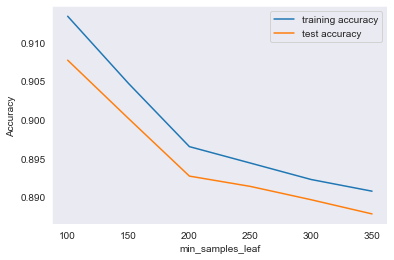

In [128]:
# Plot Accuracy with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [129]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              min_samples_leaf=100,
                                              n_estimators=80),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [130]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.964676,0.203726,0.041548,0.005068,50,{'min_samples_split': 50},0.910169,0.908356,0.911770,0.900629,0.911051,0.908395,0.004047,1,0.915813,0.915547,0.913751,0.913301,0.914514,0.914585,0.000978
1,4.727471,0.102974,0.036563,0.003228,100,{'min_samples_split': 100},0.908372,0.907996,0.913747,0.899730,0.911950,0.908359,0.004827,2,0.914106,0.912987,0.914290,0.911235,0.915592,0.913642,0.001460
2,4.560652,0.176277,0.036588,0.002280,150,{'min_samples_split': 150},0.907115,0.905121,0.913567,0.900090,0.910692,0.907317,0.004638,4,0.911905,0.911684,0.914469,0.912268,0.913661,0.912797,0.001082
3,4.466719,0.186483,0.036944,0.002516,200,{'min_samples_split': 200},0.906935,0.906559,0.911770,0.901887,0.911051,0.907640,0.003563,3,0.912534,0.913526,0.913032,0.913616,0.912807,0.913103,0.000414
4,4.664451,0.126004,0.038472,0.004592,250,{'min_samples_split': 250},0.903701,0.904223,0.910153,0.899191,0.904942,0.904442,0.003494,5,0.908580,0.910696,0.910247,0.909438,0.908225,0.909437,0.000943


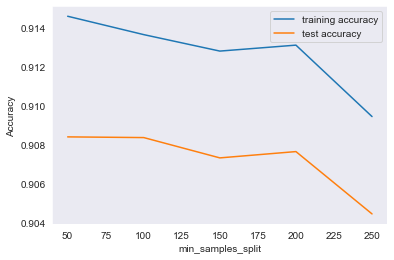

In [131]:
# Plot Accuracy with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [132]:
# Model with best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80,
                             random_state=10)

In [133]:
# fit model
rf_pca=rfc.fit(X_train_pca,y_train_smo)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [134]:
# Print scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predprob))

Accuracy : 0.9187450585783081
Recall/Sensitivity : 0.9008121900380939
AUC Score (Train): 0.976850283214887


In [135]:
# Model performance on test dataset
pred_probs_test = rf_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8748205218793456
precision score: 0.4251968503937008
Sensitivity/Recall : 0.8108108108108109
Specificity: 0.93883023294788
False Positive Rate: 0.061169767052119996
Positive predictive value: 0.4251968503937008
Negative Predictive value: 0.9888790820829656
Accuracy : 0.932063492063492


In [136]:
# Check with 0.5 probability cutoff 
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.168395,0
1,0,0.187131,0
2,0,0.099255,0
3,0,0.044652,0
4,0,0.047982,0


In [137]:
# Columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.168395,0,1,1,0,0,0,0,0,0,0,0
1,0,0.187131,0,1,1,0,0,0,0,0,0,0,0
2,0,0.099255,0,1,0,0,0,0,0,0,0,0,0
3,0,0.044652,0,1,0,0,0,0,0,0,0,0,0
4,0,0.047982,0,1,0,0,0,0,0,0,0,0,0


In [138]:
# Calculate Accuracy, Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.732229  0.999928  0.464530
0.2   0.2  0.844426  0.993100  0.695752
0.3   0.3  0.912384  0.975419  0.849350
0.4   0.4  0.929742  0.947459  0.912025
0.5   0.5  0.918745  0.900812  0.936678
0.6   0.6  0.896212  0.845037  0.947387
0.7   0.7  0.884065  0.810106  0.958025
0.8   0.8  0.858298  0.738230  0.978366
0.9   0.9  0.747682  0.500036  0.995328


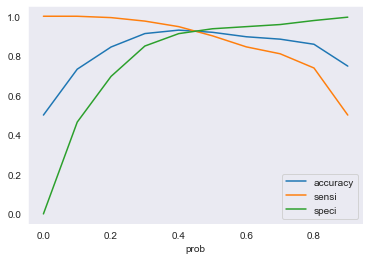

In [139]:
# Plot Accuracy, Sensitivity and Specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [140]:
#apply cutoff probability
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.168395,0
1,0,0.187131,0
2,0,0.099255,0
3,0,0.044652,0
4,0,0.047982,0


In [141]:
# Scores on train dataset
confusion = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.9275497735930424
precision score: 0.9267522777817634
Sensitivity/Recall : 0.9284841515129735
Specificity: 0.9266153956731115
False Positive Rate: 0.07338460432688852
Positive predictive value: 0.9267522777817634
Negative Predictive value: 0.9283502556347664


In [142]:
# Predict on test datset with optimal cutoff 
y_test_predrf = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_predrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['Churn_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_predrf_final.head()

,Churn,Churn_Prob,predicted
12959,0,0.076781,0
36879,0,0.106402,0
40807,0,0.281775,0
57070,1,0.953816,1
53303,0,0.065874,0


In [143]:
# Model evaluation on test dataset
confusion = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8797168208932915
precision score : 0.3906911142454161
Sensitivity/Recall : 0.8318318318318318
Specificity: 0.9276018099547512
False Positive Rate: 0.07239819004524888
Positive predictive value: 0.3906911142454161
Negative Predictive value: 0.9899839027007691


### Performance Evaluation:
 #### Random Forest
1. Roc_auc_score : 0.8797168208932915
2. Sensitivity/Recall : 0.8318318318318318

#### Logistics Regression :
1. Roc_auc_score : 0.8796126443185268
2. Sensitivity/Recall : 0.8408408408408409

1. Sensitivity/ Recall score s more important as Telecom company will not like any high value customer to churn. Therefore it is imperitive to prioritize and identify all high value customers who are liekly to churn. Misclafication of customers who may not churn but classified as churn though not desirable, should be ok in this case.

2. Random forest is better than Logistics Regression in training, howver for test dataset,  Recall of Logistics Regression is slightly better as compared with Random Forest. Difference between Train and Test scores is less for Logistics Regression than compared with Random Forest which points to Logistic Regression being more stable model and the preferred choice in this case. 

### Recommendations - Signs of Customer Churn that need to be monitored

1. Drop in month over month in number of incoming and outgoing calls 

2. Reduction in recharge amount and data usage   

3. Drop in all kinds of call and data usage 

4. Reduction in outgoing call volume 

### XGBoost Classifier

In [173]:
import xgboost as xgb 
from sklearn.metrics import accuracy_score, log_loss

In [162]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [177]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_pca,y_train_smo)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_train_pca)
xgb_predprob = xgb_cfl.predict_proba(X_train_pca)[:,1]

[21:40:08] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [181]:
# Print scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, xgb_predictions))
print ("Sensitivity/Recall:",metrics.recall_score(y_train_smo, xgb_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, xgb_predprob))

Accuracy : 0.9996765614892547
Sensitivity/Recall: 1.0
AUC Score (Train): 0.9999998966790418


In [180]:
# Model performance on test dataset
pred_probs_test = xgb_cfl.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8430851666145783
precision score: 0.5
Sensitivity/Recall : 0.7267267267267268
Specificity: 0.95944360650243
False Positive Rate: 0.04055639349756997
Positive predictive value: 0.5
Negative Predictive value: 0.984353507565337
Accuracy : 0.9471428571428572


### Hyperparameter Tuning 

In [183]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split

In [184]:
# Parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [185]:
random_search.fit(X_train_pca, y_train_smo)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 64.5min


KeyboardInterrupt: 

In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
xgb_predictions_hpt = random_search.predict(y_test)
accuracy_score(y_train_smo, xgb_predictions_hpt)

In [168]:
xgb_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [189]:
y_test_predrf_final.Churn_Prob

12959    0.076781
36879    0.106402
40807    0.281775
57070    0.953816
53303    0.065874
           ...   
6988     0.035369
42196    0.068112
18420    0.126528
35659    0.154040
66143    0.459235
Name: Churn_Prob, Length: 6300, dtype: float64

In [176]:
accuracy_score(y_test_predrf_final.predicted, xgb_predictions)

0.9484126984126984

In [167]:
y_test_predrf_final

,Churn,Churn_Prob,predicted
12959,0,0.076781,0
36879,0,0.106402,0
40807,0,0.281775,0
57070,1,0.953816,1
53303,0,0.065874,0
...,...,...,...
6988,0,0.035369,0
42196,0,0.068112,0
18420,0,0.126528,0
35659,0,0.154040,0


In [171]:
y_test_predrf_final.Churn_Prob

12959    0.076781
36879    0.106402
40807    0.281775
57070    0.953816
53303    0.065874
           ...   
6988     0.035369
42196    0.068112
18420    0.126528
35659    0.154040
66143    0.459235
Name: Churn_Prob, Length: 6300, dtype: float64

In [211]:
df = pd.read_csv('churn_probability.csv')

In [212]:
len(df)

90200

In [213]:
df.head()

,id,churn_probability
0,0,0.134601
1,1,0.096230
2,2,0.004410
3,3,0.173007
4,4,0.038892
